In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.model_selection import train_test_split

In [2]:
geo_df = pd.read_excel('data/geo.xlsx')

In [3]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108806 entries, 0 to 108805
Data columns (total 3 columns):
x                108806 non-null float64
y                108806 non-null float64
comment_class    108806 non-null int64
dtypes: float64(2), int64(1)
memory usage: 3.3 MB


In [4]:
geo_df.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [5]:
geo_df.comment_class.unique()

array([-1,  1])

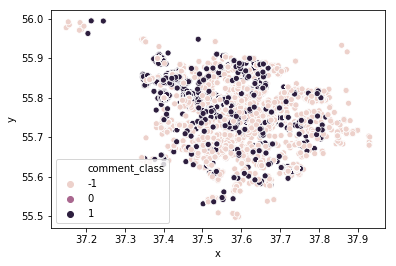

In [6]:
sns.scatterplot(geo_df.x, geo_df.y, hue = geo_df.comment_class)

визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)

In [7]:
scaler = StandardScaler()

In [8]:
X = geo_df[['x','y']]
y = geo_df.comment_class
X.head()

,x,y
0,37.612416,55.777454
1,37.612416,55.777454
2,37.603298,55.742108
3,37.558526,55.728758
4,37.566431,55.731794


In [9]:
X = scaler.fit_transform(X)

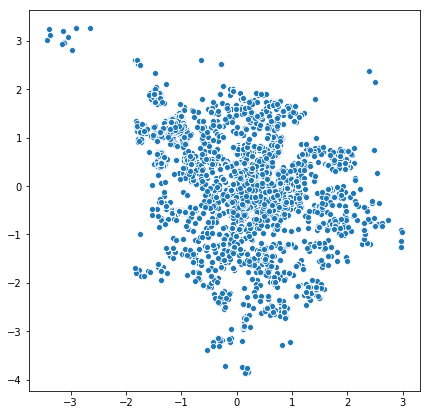

In [10]:
sns.scatterplot(X[:, 0], X[:, 1])
fig=plt.gcf()
fig.set_size_inches(7,7)

KMeans

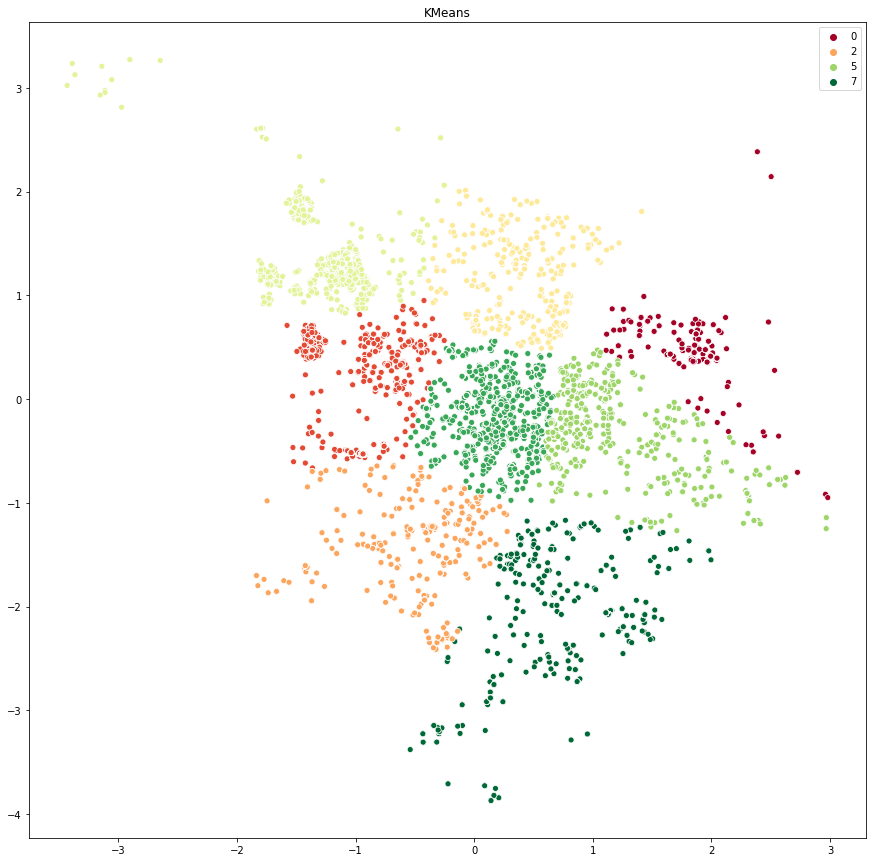

In [25]:
algorithm = KMeans(n_clusters=8)
clusters = algorithm.fit_predict(X)
sns.scatterplot(X[:, 0], X[:, 1], hue=clusters, palette='RdYlGn' ).set_title(type(algorithm).__name__)
fig=plt.gcf()
fig.set_size_inches(15,15)

In [12]:
k_inertia = []
ks = range(1,15)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X)
    k_inertia.append(clf_kmeans.inertia_)

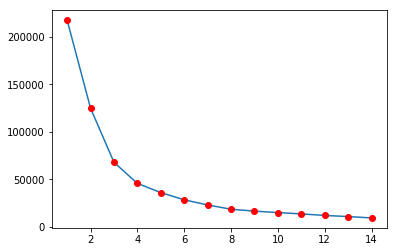

In [13]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

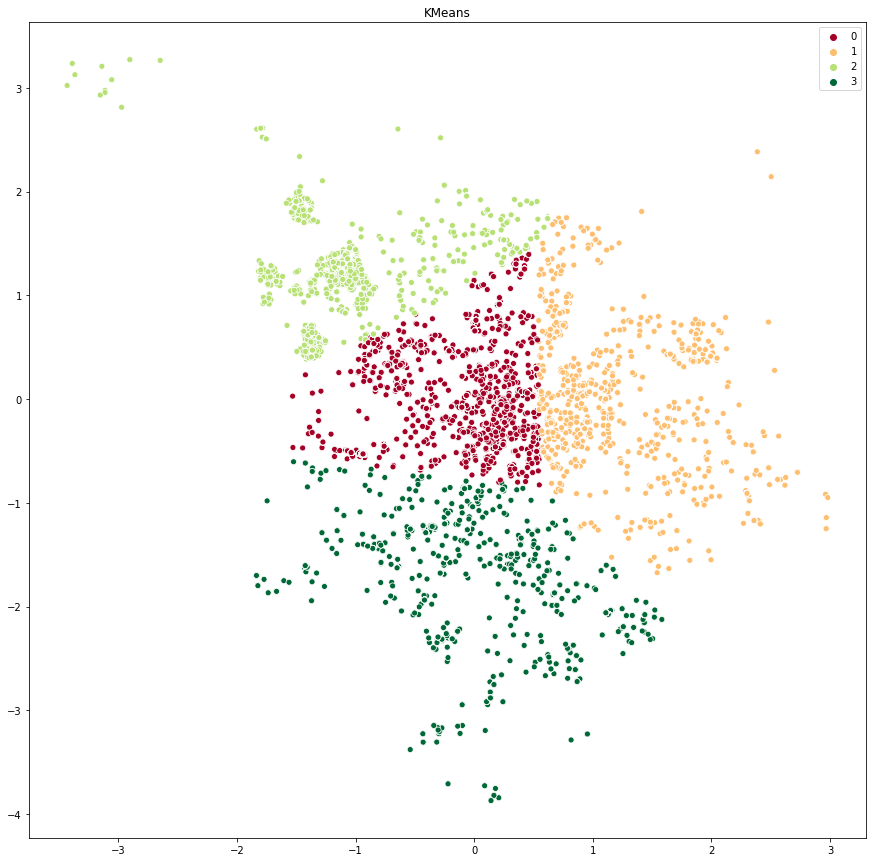

In [24]:
algorithm = KMeans(n_clusters=4)
clusters = algorithm.fit_predict(X)
sns.scatterplot(X[:, 0], X[:, 1], hue=clusters, palette='RdYlGn' ).set_title(type(algorithm).__name__)
fig=plt.gcf()
fig.set_size_inches(15,15)

Хоть перегиб кривой inertia_ в районе 3-4 кластеров, но при визуализацииданных чётких разделений не видно. По мне лучше выглядит разделение на 7 и более кластеров.

AgglomerativeClustering

In [26]:
X_train, X_test  = train_test_split(X,test_size=0.05, random_state=42)
X_train.shape, X_test.shape

((103365, 2), (5441, 2))

In [36]:
algorithm = AgglomerativeClustering(n_clusters=5)
clusters = algorithm.fit_predict(X_test)

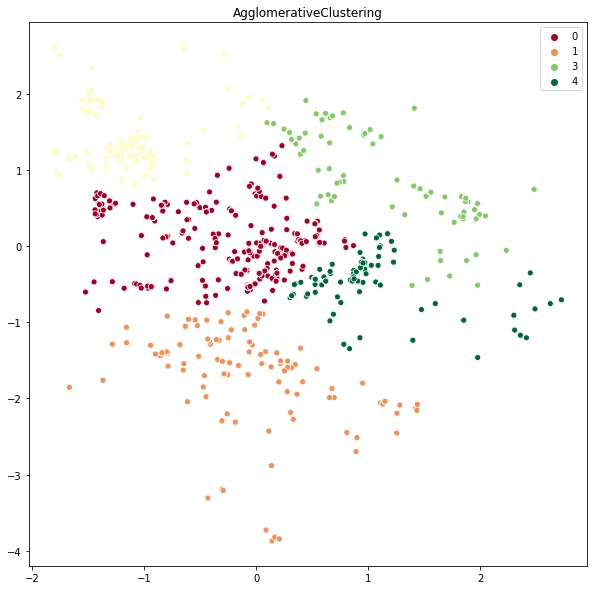

In [37]:
sns.scatterplot(X_test[:, 0], X_test[:, 1], hue=clusters, palette='RdYlGn' ).set_title(type(algorithm).__name__)
fig=plt.gcf()
fig.set_size_inches(10,10)

AffinityPropagation

In [38]:
algorithm = AffinityPropagation(max_iter=200)
clusters = algorithm.fit_predict(X_test)

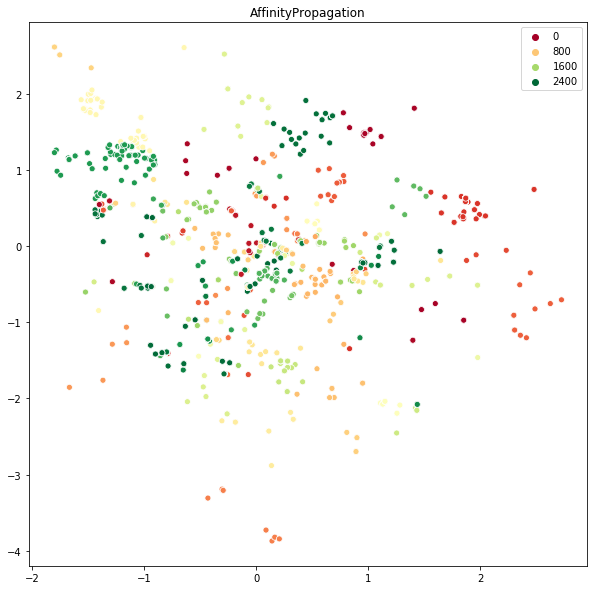

In [39]:
sns.scatterplot(X_test[:, 0], X_test[:, 1], hue=clusters, palette='RdYlGn' ).set_title(type(algorithm).__name__)
fig=plt.gcf()
fig.set_size_inches(10,10)

Алгоритм не выделил чётких кластеров.

DBSCAN

In [40]:
algorithm = DBSCAN(eps=0.2, min_samples = 20)
clusters = algorithm.fit_predict(X_test)

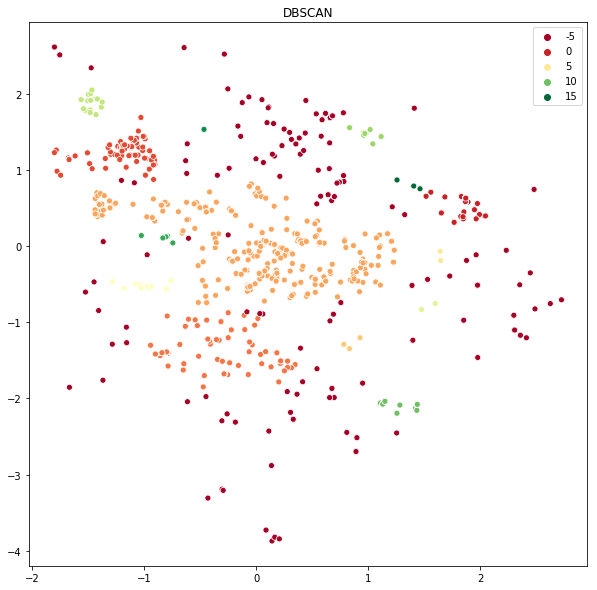

In [42]:
sns.scatterplot(X_test[:, 0], X_test[:, 1], hue=clusters, palette='RdYlGn').set_title(type(algorithm).__name__)
fig=plt.gcf()
fig.set_size_inches(10,10)

Возможно данные в таком виде не кластеризуются, либо кластеров оч много. Посмотрим в разбивке по голосам.

аналогично исследовать скопления голосов за и против отдельно

In [11]:
X = pd.DataFrame(X)
X['comment_class'] = y
X_yes = X.loc[X.comment_class == 1]
X_no = X.loc[X.comment_class == -1]
X.head()

,0,1,comment_class
0,0.367919,0.159553,-1
1,0.367919,0.159553,-1
2,0.293178,-0.348131,-1
3,-0.073819,-0.539880,-1
4,-0.009022,-0.496273,-1


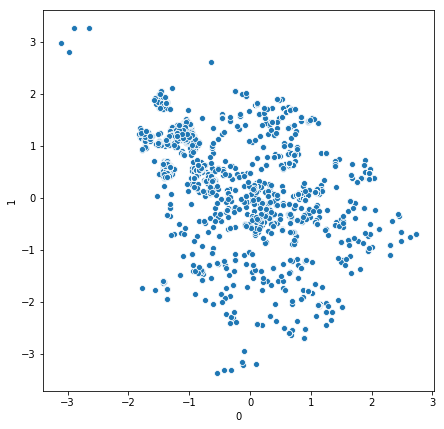

In [12]:
sns.scatterplot(X_yes[0], X_yes[1])
fig=plt.gcf()
fig.set_size_inches(7,7)

KMeans for Yes

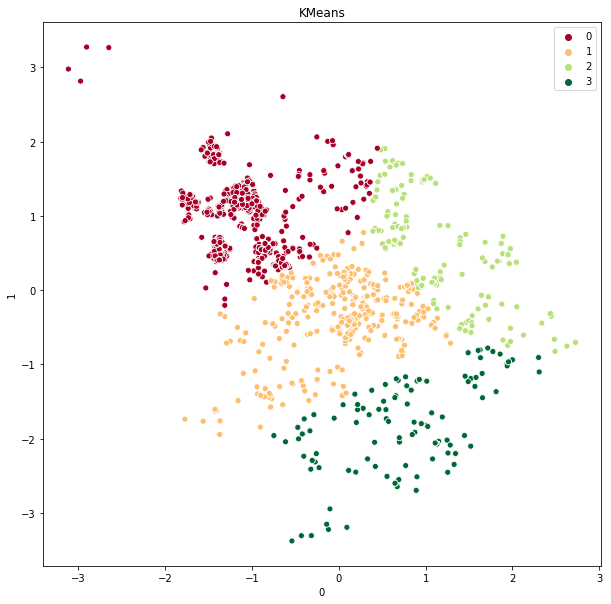

In [50]:
algorithm = KMeans(n_clusters=4)
clusters = algorithm.fit_predict(X_yes)
sns.scatterplot(X_yes[0], X_yes[1], hue=clusters, palette='RdYlGn' ).set_title(type(algorithm).__name__)
fig=plt.gcf()
fig.set_size_inches(10,10)

In [51]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_yes)
    k_inertia.append(clf_kmeans.inertia_)

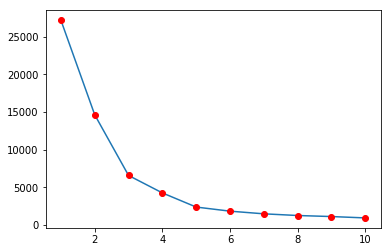

In [52]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Так себе результат

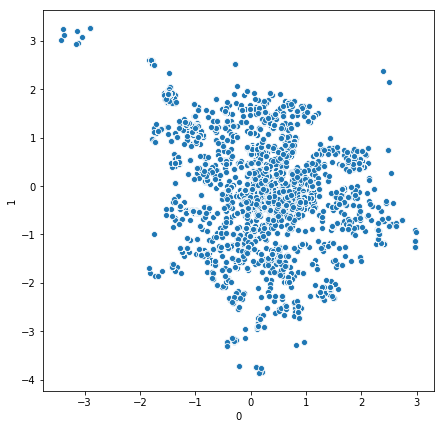

In [53]:
sns.scatterplot(X_no[0], X_no[1])
fig=plt.gcf()
fig.set_size_inches(7,7)

KMeans for no

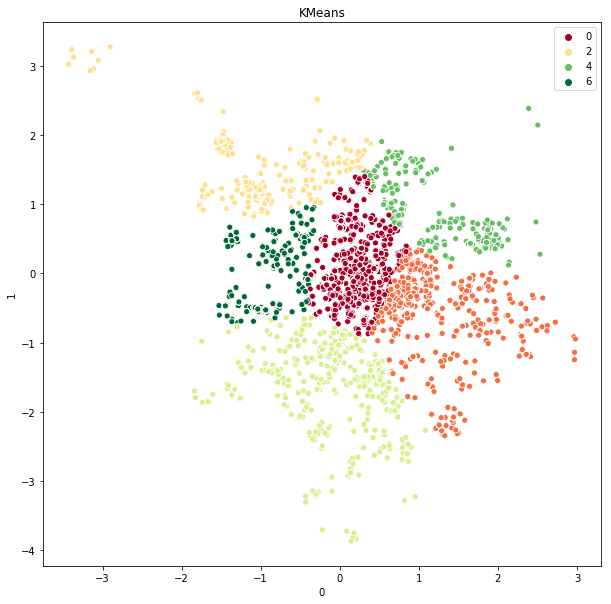

In [54]:
algorithm = KMeans(n_clusters=6)
clusters = algorithm.fit_predict(X_no)
sns.scatterplot(X_no[0], X_no[1], hue=clusters, palette='RdYlGn' ).set_title(type(algorithm).__name__)
fig=plt.gcf()
fig.set_size_inches(10,10)

In [55]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_no)
    k_inertia.append(clf_kmeans.inertia_)

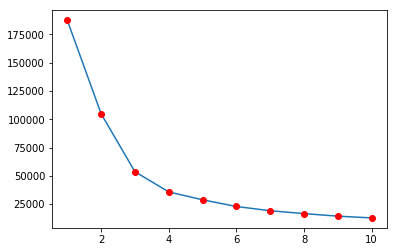

In [56]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

DBSCAN for no

In [13]:
X_no_train, X_no_test  = train_test_split(X_no,test_size=0.3, random_state=42)
X_no_train.shape, X_no_test.shape

((66602, 3), (28545, 3))

In [28]:
algorithm = DBSCAN(eps=0.2, min_samples = 20)
clusters = algorithm.fit_predict(X_no_test)

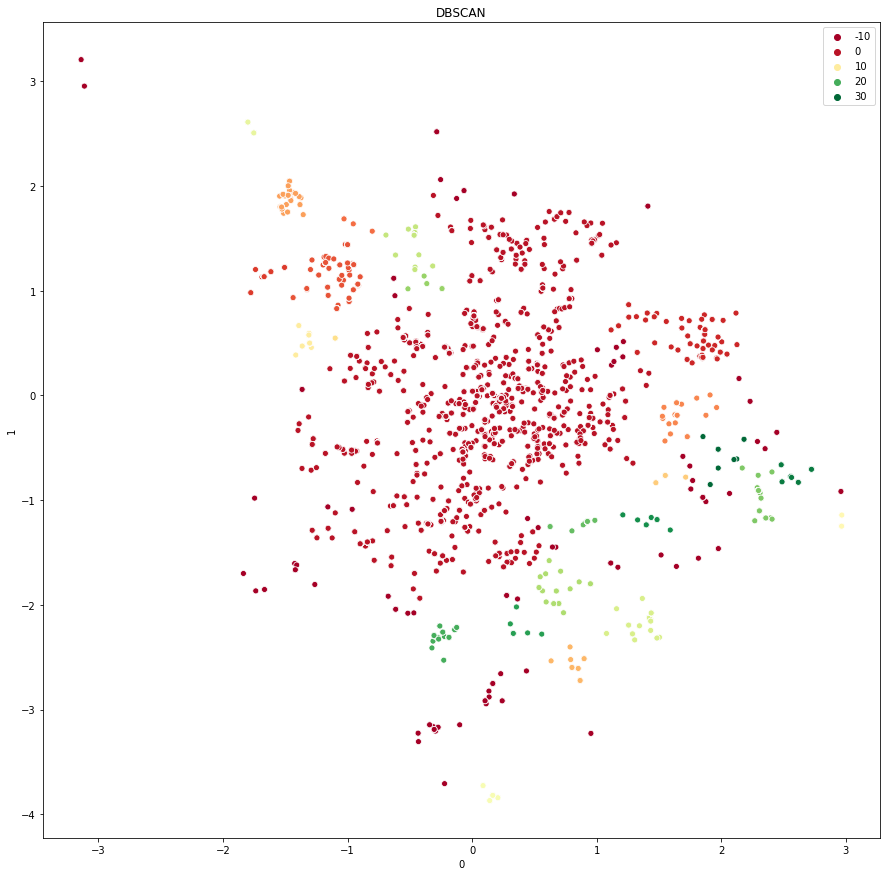

In [29]:
sns.scatterplot(X_no_test[0], X_no_test[1], hue=clusters, palette='RdYlGn').set_title(type(algorithm).__name__)
fig=plt.gcf()
fig.set_size_inches(15,15)